In [1]:
import pandas as pd  # data cleaning , data preprocessing etc
import numpy as np # mathematical calculation
import matplotlib.pyplot as plt ## data visualization
import seaborn as sns     ## data visualization

In [2]:
flight = pd.read_excel("Data_Train.xlsx")
flight.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [3]:
flight["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [4]:
round((8344 / len(flight["Additional_Info"])) * 100 , 2) 

78.11

In [5]:
flight.info() , 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


(None,)

In [6]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
flight.dropna(inplace=True)

In [8]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
flight.shape

(10682, 11)

In [10]:
df = flight.set_index('Airline' , inplace = False)
df = df.drop("Jet Airways")
print(df.shape)
flight.shape

(6833, 10)


(10682, 11)

In [11]:
flight.set_index('Airline', inplace = True)
flight = flight.drop('Trujet')
flight.reset_index(inplace = True)

In [12]:
flight["journey_day"] = pd.to_datetime(flight.Date_of_Journey , format = "%d/%m/%Y").dt.day
flight["journey_month"] = pd.to_datetime(flight.Date_of_Journey , format = "%d/%m/%Y").dt.month

In [13]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [14]:
flight.drop("Date_of_Journey" , axis = 1 , inplace = True)

In [15]:
flight.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [16]:
# Extracting hours 
flight["Dep_hour"] = pd.to_datetime(flight.Dep_Time ).dt.hour
flight["Dep_minutes"] = pd.to_datetime(flight.Dep_Time ).dt.minute

In [17]:
flight.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [18]:
flight.drop("Dep_Time" , axis = 1 , inplace = True)

In [19]:
flight.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [20]:
flight["Arrival_hour"] = pd.to_datetime(flight.Arrival_Time ).dt.hour
flight["Arrival_minutes"] = pd.to_datetime(flight.Arrival_Time ).dt.minute

In [21]:
flight.drop("Arrival_Time" , axis = 1 , inplace = True)

In [22]:
flight.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [23]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10681 non-null  object
 1   Source           10681 non-null  object
 2   Destination      10681 non-null  object
 3   Route            10681 non-null  object
 4   Duration         10681 non-null  object
 5   Total_Stops      10681 non-null  object
 6   Additional_Info  10681 non-null  object
 7   Price            10681 non-null  int64 
 8   journey_day      10681 non-null  int64 
 9   journey_month    10681 non-null  int64 
 10  Dep_hour         10681 non-null  int64 
 11  Dep_minutes      10681 non-null  int64 
 12  Arrival_hour     10681 non-null  int64 
 13  Arrival_minutes  10681 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 1.1+ MB


In [24]:
duration = list(flight["Duration"])
hours = []
minutes = []
for i in duration:
    if " " in i:   
        a , b = i.split(" ")
        hours.append(int(a[0:-1]))
        minutes.append(int(b[0:-1]))
    else:
        hours.append(int(i[0:-1]))
        minutes.append(0)

In [25]:
flight["Duration_hours"] = hours
flight["Duration_minutes"] = minutes

In [26]:
flight.drop("Duration" , axis = 1 , inplace = True)

In [27]:
flight.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [28]:
flight["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Name: Airline, dtype: int64

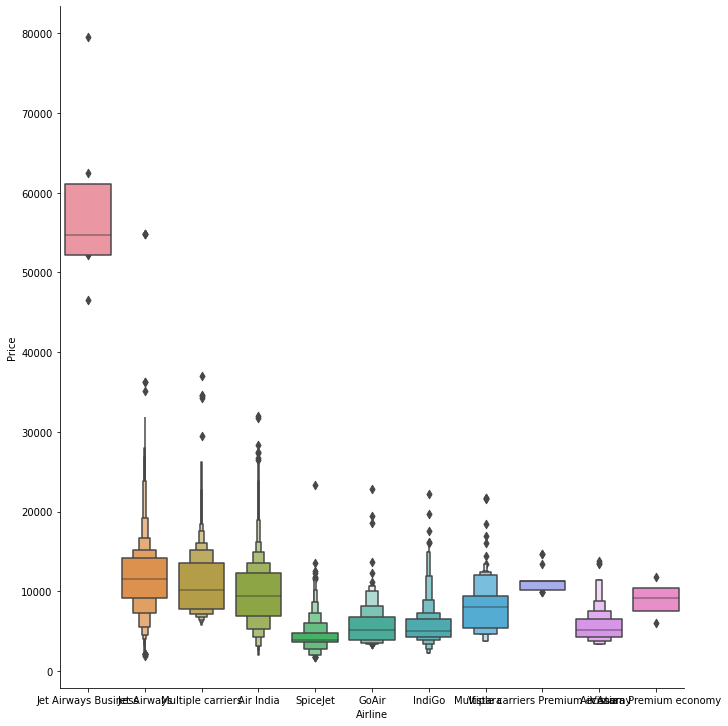

In [29]:
sns.catplot(x="Airline" , y = "Price" , data=flight.sort_values("Price" ,ascending = False ) , kind= "boxen" , height=10)

In [30]:
Airline = flight["Airline"]
Airline = pd.get_dummies(Airline , drop_first=True)
# pd.set_option('display.max_rows', None)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


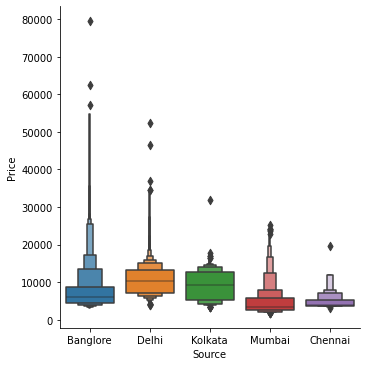

In [31]:
sns.catplot(x="Source" , y = "Price" , data=flight.sort_values("Price" ,ascending = False ) , kind= "boxen")

In [32]:
flight["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

In [33]:
Source = flight["Source"]
Source = pd.get_dummies(Source , drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


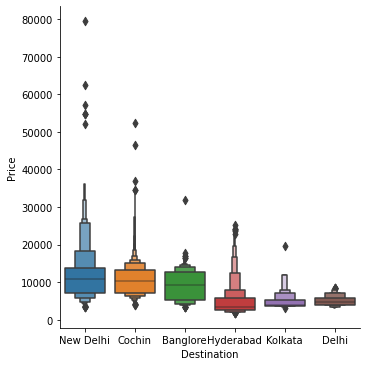

In [34]:
sns.catplot(x="Destination" , y = "Price" , data=flight.sort_values("Price" ,ascending = False ) , kind= "boxen")

In [35]:
Destination = flight["Destination"]
Destination = pd.get_dummies(Destination , drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [36]:
flight["Total_Stops"].value_counts()

1 stop      5624
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

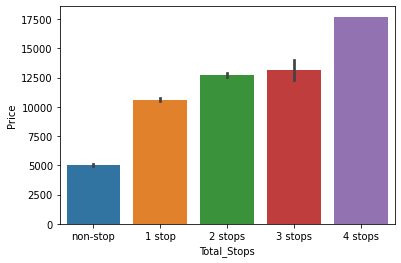

In [37]:
sns.barplot(x = "Total_Stops", y = "Price", data = flight, order = ["non-stop", "1 stop", "2 stops", "3 stops", "4 stops"])

In [38]:
categorical_variable = []
for feature in flight.columns:
    if flight[feature].dtypes == 'O':
        categorical_variable.append(feature)
print(categorical_variable)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


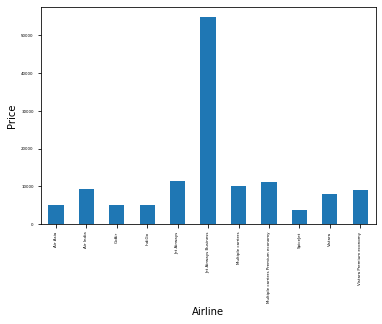

<Figure size 1152x648 with 0 Axes>

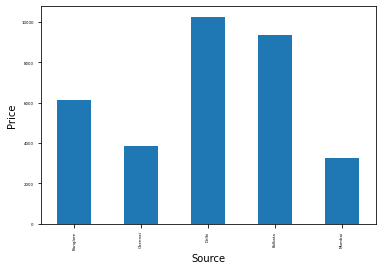

<Figure size 1152x648 with 0 Axes>

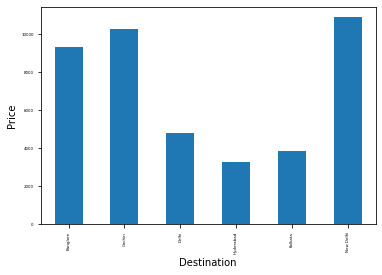

<Figure size 1152x648 with 0 Axes>

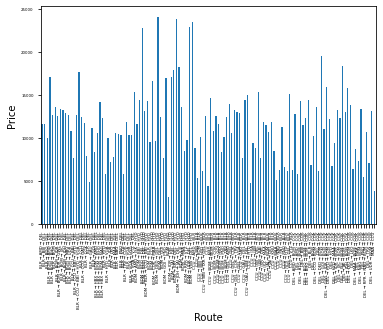

<Figure size 1152x648 with 0 Axes>

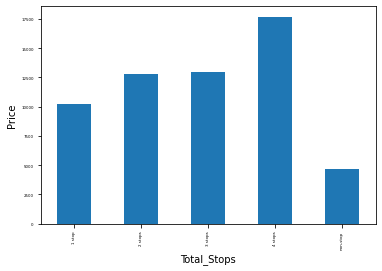

<Figure size 1152x648 with 0 Axes>

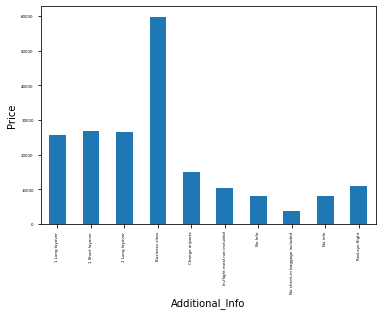

<Figure size 1152x648 with 0 Axes>

In [39]:
for feature in categorical_variable:
    flight.groupby(feature)["Price"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.tick_params(labelsize = 4)
    plt.figure(figsize=(16, 9))
    plt.show()

In [40]:
flight["Additional_Info"].value_counts()

No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [41]:
flight.replace({"non-stop" : 0, "1 stop" : 1, "2 stops" : 2, "3 stops" : 3, "4 stops" : 4}, inplace=True)

In [42]:
flight.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45


In [43]:
flight.drop(["Route", "Airline", "Destination", "Source", "Additional_Info"], axis = 1, inplace = True)

In [44]:
flight.head()

,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,0
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45


In [45]:
flight = pd.concat([Airline, Destination, Source, flight], axis = 1)

In [46]:
pd.set_option('display.max_columns', None)
flight.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2,13882,9,6,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,13302,1,3,16,50,21,35,4,45


In [47]:
flight.shape

(10681, 29)

# Preprocessing for Test Data

In [48]:
test = pd.read_excel("Test_Set.xlsx")
test.dropna(inplace=True) # Dropping all rows with null values

# We are extracting days and month from Date_of_Journey
test["journey_day"] = pd.to_datetime(test.Date_of_Journey , format = "%d/%m/%Y").dt.day 
test["journey_month"] = pd.to_datetime(test.Date_of_Journey , format = "%d/%m/%Y").dt.month

test.drop("Date_of_Journey" , axis = 1 , inplace = True) # Dropping Date_of_Journey because we already extracted days and month

# Extracting departure hours and departure minutes from departure time 
test["Dep_hour"] = pd.to_datetime(test.Dep_Time ).dt.hour
test["Dep_minutes"] = pd.to_datetime(test.Dep_Time ).dt.minute

test.drop("Dep_Time" , axis = 1 , inplace = True) # Dropping Dep_Time as we already extracted hours and minutes from data

# Extracting arrival hours and arrival minutes from arrival time
test["Arrival_hour"] = pd.to_datetime(test.Arrival_Time ).dt.hour
test["Arrival_minutes"] = pd.to_datetime(test.Arrival_Time ).dt.minute

test.drop("Arrival_Time" , axis = 1 , inplace = True) # Dropping Arrival_Time as we already extracted hours and minutes

# Extracting duration hours and minutes from Duration
duration = list(test["Duration"])
hours = []
minutes = []
for i in duration:
    if " " in i:   
        a , b = i.split(" ")
        hours.append(int(a[0:-1]))
        minutes.append(int(b[0:-1]))
    else:
        hours.append(int(i[0:-1]))
        minutes.append(0)
        
test["Duration_hours"] = hours
test["Duration_minutes"] = minutes

test.drop("Duration" , axis = 1 , inplace = True) # Dropping Duration as we already extracted hours and minutes

# Handling Categorical Variables

# Creating dummy variables for Airline | Airline is Nominal variable. 
Airline = test["Airline"]
Airline = pd.get_dummies(Airline , drop_first=True)

# Creating dummy variables for Source | Source is Nominal variable. 
Source = test["Source"]
Source = pd.get_dummies(Source , drop_first=True)

# Creating dummy variables for Destination | Destination is Nominal variable. 
Destination = test["Destination"]
Destination = pd.get_dummies(Destination , drop_first=True)

# Giving ranks to total stops | Total_Stops is Ordinal data. 
test.replace({"non-stop" : 0, "1 stop" : 1, "2 stops" : 2, "3 stops" : 3, "4 stops" : 4}, inplace=True)

# Dropping all previously extracted data variables
# Dropping additional_info because almost 80% of data is missing.
test.drop(["Route", "Airline", "Destination", "Source", "Additional_Info"], axis = 1, inplace = True)

# Concatenating datetime varibales with categorical variables
test = pd.concat([Airline, Destination, Source, test], axis = 1)

In [49]:
test.shape

(2671, 28)

In [50]:
pd.set_option('display.max_columns', None)
test.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Total_Stops,journey_day,journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,6,6,17,30,4,25,10,55
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,12,5,6,20,10,20,4,0
2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,21,5,19,15,19,0,23,45
3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,21,5,8,0,21,0,13,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,24,6,23,55,2,45,2,50


In [51]:
flight.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2,13882,9,6,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,13302,1,3,16,50,21,35,4,45


In [52]:
flight.shape # One column is extra which is price [Target Variable]

(10681, 29)

In [53]:
test.shape # One column is less because price is missing which we have to find. 

(2671, 28)

## Splitting Dependent and Independent Variables

In [54]:
x = flight.drop("Price", axis = 1)
y = flight["Price"]

In [55]:
flight.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2,13882,9,6,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,13302,1,3,16,50,21,35,4,45


In [56]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10676     4107
10677     4145
10678     7229
10679    12648
10680    11753
Name: Price, Length: 10681, dtype: int64

In [57]:
from sklearn.ensemble import ExtraTreesRegressor
Reg = ExtraTreesRegressor()
Reg.fit(x, y)

ExtraTreesRegressor()

In [58]:
print(Reg.feature_importances_)

[8.18044337e-03 1.90830505e-03 1.88888231e-02 1.36191196e-01
 6.76204531e-02 1.89764188e-02 8.13247740e-04 3.26110302e-03
 4.62565542e-03 8.57911362e-05 9.72751886e-03 1.41294586e-02
 8.39398065e-03 6.14660738e-04 2.47600371e-02 4.67703085e-04
 1.03658187e-02 3.49287770e-03 5.97698632e-03 2.38703108e-01
 1.44416022e-01 5.26215155e-02 2.47275729e-02 2.09906909e-02
 2.77224687e-02 1.85923793e-02 1.16311944e-01 1.74338208e-02]


In [59]:
x.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Cochin', 'Delhi', 'Hyderabad',
       'Kolkata', 'New Delhi', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Total_Stops', 'journey_day', 'journey_month', 'Dep_hour',
       'Dep_minutes', 'Arrival_hour', 'Arrival_minutes', 'Duration_hours',
       'Duration_minutes'],
      dtype='object')

<AxesSubplot:>

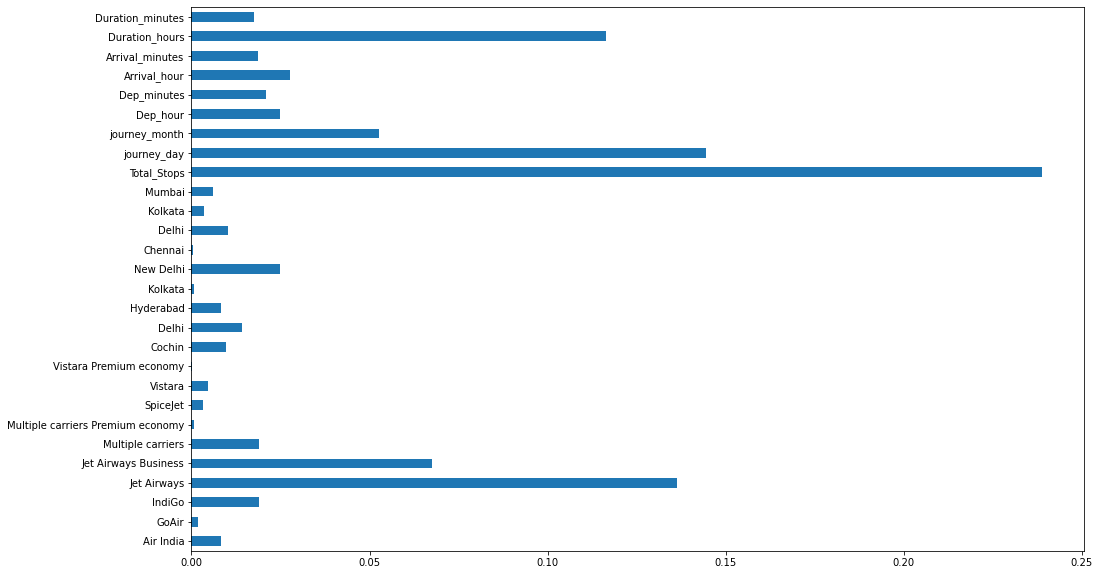

In [60]:
plt.figure(figsize = (16,10))
a = pd.Series(Reg.feature_importances_, index = x.columns)
a.plot.barh()

# Model Building

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [62]:
from sklearn.metrics import mean_squared_error # for calculating mean_squared error
from sklearn.metrics import r2_score # for measering the goodness of best fit line

## Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor
Forest = RandomForestRegressor()
Forest.fit(X_train, y_train)

y_pred = Forest.predict(X_test)

score = r2_score(y_test, y_pred)

print(f"accuracy of the model is  {score}")

print('RMSE for Linear Regression < =',np.sqrt(mean_squared_error(y_test,y_pred)))

accuracy of the model is  0.7004366794533397
RMSE for Linear Regression < = 2707.9236482447195


In [64]:
"""import xgboost
xgb_model = xgboost.XGBRegressor()
xgb_model.fit(X_train,y_train)"""

'import xgboost\nxgb_model = xgboost.XGBRegressor()\nxgb_model.fit(X_train,y_train)'

## Hyperparameter tuning with Random Forest

In [65]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params={ "criterion" : ["mse", "mae"] ,
          'max_depth': [3,5,10, 12 , 15 , 20 ,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':["auto", "sqrt", "log2"],
               'min_samples_split' : [2, 5, 10, 15, 100],
               'min_samples_leaf': [1, 2, 5, 10],
              }
random = RandomizedSearchCV(estimator = Forest, param_distributions = params, n_iter = 10, cv = 5,verbose=2, random_state=42, n_jobs = 1)
random.fit(X_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   1.4s
[CV] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   1.5s
[CV] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   1.3s
[CV] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   1.6s
[CV] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   1.5s
[CV] END criterion=mae, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=400; total time= 2.2min
[CV] END criterion=mae, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=400; total 

In [ ]:
random.best_params_

In [ ]:
y_pred = random.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"accuracy of the model is  {score}")
print('RMSE for Linear Regression < =',np.sqrt(mean_squared_error(y_test,y_pred)))

In [ ]:
Forest = RandomForestRegressor(n_estimators= 500,
                               min_samples_split= 2,
                               min_samples_leaf= 1,
                               max_features= 'log2',
                               max_depth= 15,
                               criterion= 'mse')
Forest.fit(X_train, y_train)

y_pred = Forest.predict(X_test)

score = r2_score(y_test, y_pred)

print(f"accuracy of the model is  {score}")

print('RMSE for Linear Regression < =',np.sqrt(mean_squared_error(y_test,y_pred)))

In [ ]:
import pickle
  
# Save the trained model as a pickle string.
pickle.dump(Forest ,  open('model.pkl', 'wb'))
  
# Load the pickled model
model = pickle.load(open('model.pkl', 'rb'))
  
# Use the loaded pickled model to make predictions
model.predict(test)

In [ ]:
model.predict(test)